In [ ]:
# importation des bibliotheques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import scipy.stats as spy
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.svm import SVC
from sklearn import neighbors
from sklearn import datasets
from sklearn import neighbors
from sklearn import datasets
#import shap
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')
import time
from datetime import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline
pd.set_option('display.max_columns', 500)
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
import time
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, make_scorer
import shap
%matplotlib inline
import plotly.graph_objects as go
from plotly.subplots import make_subplots


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 5.5 MB/s eta 0:00:00


In [ ]:
#Chargement du dataframe obtenu après le rendu 1 / df(5363, 23)
from google.colab import files
file = files.upload()

Saving Projet_co2.csv to Projet_co2.csv


In [ ]:
data=pd.read_csv("Projet_co2.csv")
df=data.copy()
df.head()

,Marque,Modèle dossier,Modèle UTAC,Désignation commerciale,CNIT,Type Variante Version (TVV),Carburant,Hybride,Puissance administrative,Puissance maximale (kW),Boîte de vitesse,Consommation urbaine (l/100km),Consommation extra-urbaine (l/100km),Consommation mixte (l/100km),CO2 (g/km),CO type I (g/km),NOX (g/km),masse vide euro min (kg),masse vide euro max (kg),Champ V9,Date de mise à jour,Carrosserie,gamme
0,ALFA-ROMEO,159,159,159 1750 Tbi (200ch),M10ALFVP000G340,939AXN1B52C,ES,non,12,147.0,M 6,11.3,5.8,7.8,182.0,0.647,0.032,1505,1505,715/2007*692/2008EURO5,juin-13,BREAK,MOY-SUPER
1,ALFA-ROMEO,159,159,159 2.0 JTDm (170ch) ECO,M10ALFVP000U221,939AXP1B54C,GO,non,9,125.0,M 6,6.6,4.3,5.1,136.0,0.192,0.169,1565,1565,715/2007*692/2008EURO5,juin-13,BERLINE,MOY-SUPER
2,ALFA-ROMEO,159,159,159 2.0 JTDm (136ch),M10ALFVP000E302,939AXR1B64,GO,non,7,100.0,M 6,6.6,4.2,5.1,134.0,0.066,0.149,1565,1565,715/2007*692/2008EURO5,juin-13,BERLINE,MOY-SUPER
3,ALFA-ROMEO,159,159,159 2.0 JTDm (170ch),M10ALFVP000G304,939AXS1B66,GO,non,9,125.0,M 6,6.9,4.3,5.3,139.0,0.060,0.164,1565,1565,715/2007*692/2008EURO5,juin-13,BERLINE,MOY-SUPER
4,ALFA-ROMEO,159,159,159 1750 Tbi (200ch),M10ALFVP000H341,939BXN1B53C,ES,non,12,147.0,M 6,11.5,6.0,8.0,186.0,0.647,0.032,1555,1555,715/2007*692/2008EURO5,juin-13,BREAK,MOY-SUPER


# Prétraitement

In [ ]:
dfc=data.copy()

In [ ]:
# Regrouper les modalités de la variable CO2 pour créer Les classes vertes A, B, C,D, E, F, G pour faire la classification

dfc['Class_co2'] = pd.cut(x = dfc['CO2 (g/km)'] ,
                  bins = [0,100,120,140,160,200,250,dfc['CO2 (g/km)'].max()],
                  labels = ['A','B','C','D','E','F','G'])

dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5363 entries, 0 to 5362
Data columns (total 24 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   Marque                                5363 non-null   object  
 1   Modèle dossier                        5363 non-null   object  
 2   Modèle UTAC                           5363 non-null   object  
 3   Désignation commerciale               5363 non-null   object  
 4   CNIT                                  5363 non-null   object  
 5   Type Variante Version (TVV)           5363 non-null   object  
 6   Carburant                             5363 non-null   object  
 7   Hybride                               5363 non-null   object  
 8   Puissance administrative              5363 non-null   int64   
 9   Puissance maximale (kW)               5363 non-null   float64 
 10  Boîte de vitesse                      5363 non-null   object  
 11  Cons

In [ ]:
# suppression des variable pas importantes pour notre model
data_classif = dfc.drop(columns = ['Marque','Modèle dossier','Modèle UTAC','Désignation commerciale','CNIT',
                          'Type Variante Version (TVV)','Puissance administrative','masse vide euro min (kg)',
                          'Champ V9','Date de mise à jour','CO type I (g/km)','CO2 (g/km)','NOX (g/km)'])
data_classif.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5363 entries, 0 to 5362
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   Carburant                             5363 non-null   object  
 1   Hybride                               5363 non-null   object  
 2   Puissance maximale (kW)               5363 non-null   float64 
 3   Boîte de vitesse                      5363 non-null   object  
 4   Consommation urbaine (l/100km)        5363 non-null   float64 
 5   Consommation extra-urbaine (l/100km)  5363 non-null   float64 
 6   Consommation mixte (l/100km)          5363 non-null   float64 
 7   masse vide euro max (kg)              5363 non-null   int64   
 8   Carrosserie                           5363 non-null   object  
 9   gamme                                 5363 non-null   object  
 10  Class_co2                             5363 non-null   category
dtypes: c

In [ ]:
# Séparation du jeux de donnée en jeux de test et d'entrainement
X = data_classif.drop(columns= 'Class_co2' , axis= 1)
y = data_classif['Class_co2'].replace({'A':0,'B':1,'C':2,'D':3,'E':4,'F':5,'G':6})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25 , shuffle=True)

X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1341 entries, 3129 to 774
Data columns (total 10 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Carburant                             1341 non-null   object 
 1   Hybride                               1341 non-null   object 
 2   Puissance maximale (kW)               1341 non-null   float64
 3   Boîte de vitesse                      1341 non-null   object 
 4   Consommation urbaine (l/100km)        1341 non-null   float64
 5   Consommation extra-urbaine (l/100km)  1341 non-null   float64
 6   Consommation mixte (l/100km)          1341 non-null   float64
 7   masse vide euro max (kg)              1341 non-null   int64  
 8   Carrosserie                           1341 non-null   object 
 9   gamme                                 1341 non-null   object 
dtypes: float64(4), int64(1), object(5)
memory usage: 115.2+ KB


In [ ]:
# pipeline prétraitement
numeric_features = ['Puissance maximale (kW)', 'Consommation urbaine (l/100km)', 'Consommation extra-urbaine (l/100km)',
                    'Consommation mixte (l/100km)', 'masse vide euro max (kg)']

# Traitement des valeurs numériques
numeric_transformer =  StandardScaler()

# Traitement des variables catégorielles
categorical_features = ['Carburant', 'Hybride', 'Boîte de vitesse', 'Carrosserie', 'gamme']
categorical_transformer = OneHotEncoder(drop = "first", sparse=False)

#Column Tranformer pour appliquer les transformations sur certaines colonnes
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

In [ ]:
# transformation des données
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

Text(0.5, 1.0, 'Distribution de des classes')

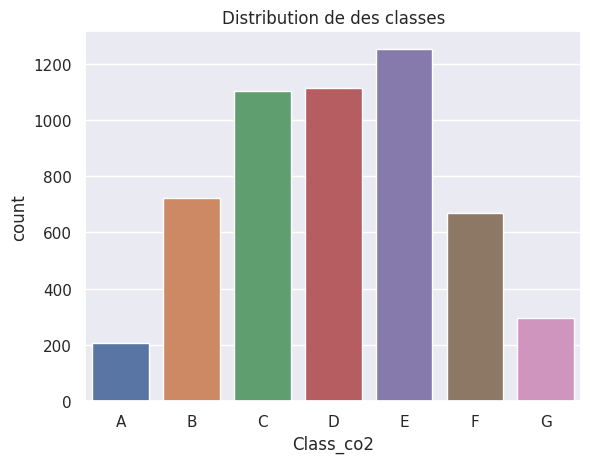

In [ ]:
# afficher la distribution de des classes
g = sns.countplot(x = y)
g.set_xticklabels(['A', 'B', 'C', 'D',
                   'E', 'F', 'G'])
plt.title('Distribution de des classes')

# Modèls de Classification

In [ ]:
# Regrestion Logistique
start = datetime.now()

LR = LogisticRegression()
LR.fit(X_train,y_train)

y_pred = LR.predict(X_test)

cm = pd.crosstab(y_test,y_pred, rownames =['réalité'], colnames = ['predictions']);
display(cm);
print("le score de bonne prédiction est :" ,LR.score(X_test, y_test) );
print(classification_report(y_test,y_pred));

end = datetime.now()
print(f"le temps de calcul est : {end - start}")

predictions,0,1,2,3,4,5,6
réalité,,,,,,,
0,47,7,0,0,0,0,0
1,4,154,15,4,0,0,0
2,0,8,246,11,0,0,0
3,0,0,18,256,12,0,0
4,0,0,0,21,287,3,0
5,0,0,0,0,24,142,1
6,0,0,0,0,0,3,78


le score de bonne prédiction est : 0.9023117076808352
              precision    recall  f1-score   support

           0       0.92      0.87      0.90        54
           1       0.91      0.87      0.89       177
           2       0.88      0.93      0.90       265
           3       0.88      0.90      0.89       286
           4       0.89      0.92      0.91       311
           5       0.96      0.85      0.90       167
           6       0.99      0.96      0.97        81

    accuracy                           0.90      1341
   macro avg       0.92      0.90      0.91      1341
weighted avg       0.90      0.90      0.90      1341

le temps de calcul est : 0:00:00.354202


In [ ]:
# SVM

start = datetime.now()

svm = svm.SVC(C = 10000,gamma = 0.002 ,kernel='rbf')
svm.fit(X_train,y_train)

y_pred = svm.predict(X_test)
display(pd.crosstab(y_test, y_pred ,rownames=['réalité'], colnames =['predictions']))

print('le score pour du modèle sur l\'enseble d\entrainement est :',svm.score(X_train, y_train))
print('le score pour du modèle sur l\'enseble de test est :',svm.score(X_test, y_test))

print(classification_report(y_test,y_pred))

end = datetime.now()
print(f"le temps de calcul est : {end - start}")

predictions,0,1,2,3,4,5,6
réalité,,,,,,,
0,52,2,0,0,0,0,0
1,3,174,0,0,0,0,0
2,0,3,257,5,0,0,0
3,0,0,5,277,4,0,0
4,0,0,0,6,305,0,0
5,0,0,0,0,3,164,0
6,0,0,0,0,0,2,79


le score pour du modèle sur l'enseble d\entrainement est : 0.9910492292391845
le score pour du modèle sur l'enseble de test est : 0.9753914988814317
              precision    recall  f1-score   support

           0       0.95      0.96      0.95        54
           1       0.97      0.98      0.98       177
           2       0.98      0.97      0.98       265
           3       0.96      0.97      0.97       286
           4       0.98      0.98      0.98       311
           5       0.99      0.98      0.98       167
           6       1.00      0.98      0.99        81

    accuracy                           0.98      1341
   macro avg       0.98      0.97      0.97      1341
weighted avg       0.98      0.98      0.98      1341

le temps de calcul est : 0:00:00.595192


In [ ]:
# K plus proches voisins
start = datetime.now()

knn = neighbors.KNeighborsClassifier()
knn.fit(X_train , y_train)

y_pred = knn.predict(X_test)
cm = pd.crosstab(y_test, y_pred , rownames =['classe réelle'], colnames =['classe prédite'])
display(cm)
print('le score pour du modèle sur l\'enseble d\'entrainement est :',knn.score(X_train, y_train))
print('le score pour du modèle sur l\'enseble de test est :',knn.score(X_test, y_test))
print(classification_report(y_test,y_pred))

end = datetime.now()
print(f"le temps de calcul est : {end - start}")

classe prédite,0,1,2,3,4,5,6
classe réelle,,,,,,,
0,39,15,0,0,0,0,0
1,11,146,17,3,0,0,0
2,0,17,221,27,0,0,0
3,0,0,40,228,17,1,0
4,0,0,3,29,274,5,0
5,0,0,0,0,20,140,7
6,0,0,0,0,0,5,76


le score pour du modèle sur l'enseble d'entrainement est : 0.8990551964196917
le score pour du modèle sur l'enseble de test est : 0.8381804623415362
              precision    recall  f1-score   support

           0       0.78      0.72      0.75        54
           1       0.82      0.82      0.82       177
           2       0.79      0.83      0.81       265
           3       0.79      0.80      0.80       286
           4       0.88      0.88      0.88       311
           5       0.93      0.84      0.88       167
           6       0.92      0.94      0.93        81

    accuracy                           0.84      1341
   macro avg       0.84      0.83      0.84      1341
weighted avg       0.84      0.84      0.84      1341

le temps de calcul est : 0:00:00.623894


In [ ]:
start = datetime.now()
dt = DecisionTreeClassifier(max_depth = 4, random_state=42)

dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

cm = pd.crosstab(y_test, y_pred , rownames =['classe réelle'], colnames =['classe prédite'])
display(cm)
print('le score sur l\'ensemble d\'entrainement est :',dt.score(X_train,y_train))
print('le score sur l\'ensemble de test est :',dt.score(X_test,y_test))

print(classification_report(y_test,y_pred))
end = datetime.now()
print(f"le temps de calcul est : {end - start}")

classe prédite,0,1,2,3,4,5,6
classe réelle,,,,,,,
0,35,19,0,0,0,0,0
1,0,172,1,3,1,0,0
2,0,3,238,24,0,0,0
3,0,0,2,273,4,7,0
4,0,0,0,31,267,13,0
5,0,0,0,0,10,157,0
6,0,0,0,0,0,1,80


le score sur l'ensemble d'entrainement est : 0.9102436598707111
le score sur l'ensemble de test est : 0.9112602535421327
              precision    recall  f1-score   support

           0       1.00      0.65      0.79        54
           1       0.89      0.97      0.93       177
           2       0.99      0.90      0.94       265
           3       0.82      0.95      0.88       286
           4       0.95      0.86      0.90       311
           5       0.88      0.94      0.91       167
           6       1.00      0.99      0.99        81

    accuracy                           0.91      1341
   macro avg       0.93      0.89      0.91      1341
weighted avg       0.92      0.91      0.91      1341

le temps de calcul est : 0:00:00.047517


In [ ]:
# Random Forest
from sklearn import ensemble
start = datetime.now()
rf = ensemble.RandomForestClassifier(n_jobs=-1, min_samples_leaf = 1, n_estimators = 500,random_state=321)
rf.fit(X_train,y_train)

y_pred = rf.predict(X_test)

display(pd.crosstab(y_test, y_pred, rownames=['classe réelle'], colnames =['classe prédite']))

print('le score sur l\'ensemble d\'entrainement : ',rf.score(X_train,y_train))
print('le score sur l\'ensemble de test : ',rf.score(X_test,y_test))
print(classification_report(y_test,y_pred))

end = datetime.now()
print(f"le temps de calcul est : {end - start}")

classe prédite,0,1,2,3,4,5,6
classe réelle,,,,,,,
0,51,1,0,0,0,0,0
1,0,156,3,1,0,0,0
2,0,0,267,4,0,0,0
3,0,0,3,289,4,0,0
4,0,0,0,3,320,0,0
5,0,0,0,0,2,159,0
6,0,0,0,0,0,2,76


le score sur l'ensemble d'entrainement :  0.9995027349577325
le score sur l'ensemble de test :  0.9828486204325131
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        52
           1       0.99      0.97      0.98       160
           2       0.98      0.99      0.98       271
           3       0.97      0.98      0.97       296
           4       0.98      0.99      0.99       323
           5       0.99      0.99      0.99       161
           6       1.00      0.97      0.99        78

    accuracy                           0.98      1341
   macro avg       0.99      0.98      0.98      1341
weighted avg       0.98      0.98      0.98      1341

le temps de calcul est : 0:00:03.011441


Validation Croisée

In [ ]:
start = datetime.now()
# Instancier des classifieurs
clf_lr = LogisticRegression(random_state=42, max_iter=2000)
clf_rf = RandomForestClassifier(random_state=42)
clf_svc = SVC(random_state=42)
# Création des grilles de paramètres
param_grid_lr = {'solver': ['liblinear', 'lbfgs'], 'C': np.logspace(-4, 2, 9)}
param_grid_rf = [{'n_estimators': [10, 50, 100, 250, 500, 1000],
                        'min_samples_leaf': [1, 3, 5],
                        'max_features': ['sqrt', 'log2']}]

param_grid_svc = [{'kernel': ['rbf'], 'C': np.logspace(-4, 4, 9), 'gamma': np.logspace(-4, 0, 4)},
                       {'kernel': ['linear'], 'C': np.logspace(-4, 4, 9)}]

gridcvs = {}

for pgrid, clf, name in zip((param_grid_lr, param_grid_rf, param_grid_svc),
                            (clf_lr, clf_rf, clf_svc),
                            ('LogisticRegression', 'RF', 'SVM')):
    gcv = GridSearchCV(clf, pgrid, cv=3, refit=True)
    gridcvs[name] = gcv

outer_cv = StratifiedKFold(n_splits=3, shuffle=True)
outer_scores = {}

for name, gs in gridcvs.items():
    nested_score = cross_val_score(gs, X_train, y_train, cv=outer_cv)
    outer_scores[name] = nested_score
    print(f'{name}: outer accuracy {100*nested_score.mean():.2f} +/- {100*nested_score.std():.2f}')

end = datetime.now()
print(f"le temps de calcul est : {end - start}")

LogisticRegression: outer accuracy 96.15 +/- 0.87
RF: outer accuracy 98.14 +/- 0.42
SVM: outer accuracy 96.87 +/- 0.64
le temps de calcul est : 0:08:52.956024


In [ ]:
start = datetime.now()

final_clf = gridcvs['RF']
final_clf.fit(X_train, y_train)
# Affichage des meilleurs paramètres pour le model choisi .
print(f'Best Parameters: {final_clf.best_params_}')

train_acc = accuracy_score(y_true=y_train, y_pred=final_clf.predict(X_train))
test_acc = accuracy_score(y_true=y_test, y_pred=final_clf.predict(X_test))
print(f'Training Accuracy: {100*train_acc:.2f}')
print(f'Test Accuracy: {100*test_acc:.2f}')

end = datetime.now()
print(f"le temps de calcul est : {end - start}")

,Importance
Consommation mixte (l/100km),0.285700
Consommation extra-urbaine (l/100km),0.209953
Consommation urbaine (l/100km),0.208619
masse vide euro max (kg),0.081582
Puissance maximale (kW),0.061224
Carburant_GO,0.026520
Carburant_ES,0.025345
Carrosserie_MINIBUS,0.011385


<Axes: >

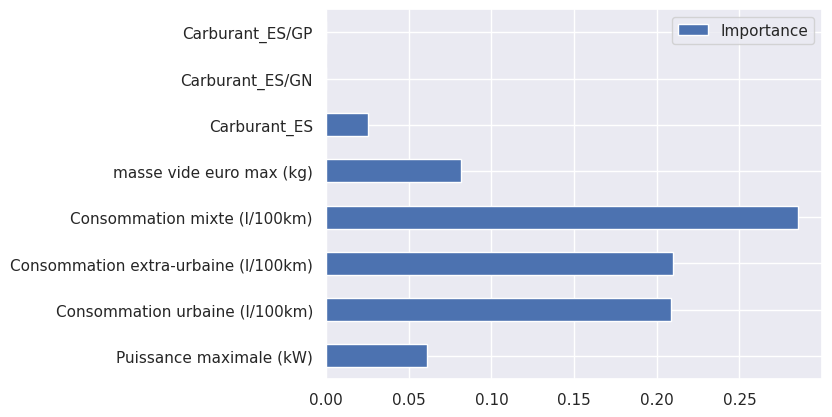

In [ ]:
# Importance des variable dans RandomForest

# récuperation des noms des variables
column_names = (
    numeric_features + preprocessor.named_transformers_["cat"].get_feature_names_out().tolist()
)
column_names

feats = {}
for featur,importance in zip(column_names,rf.feature_importances_):
    feats[featur] = importance
# creation de Dataframe des inportances des variables
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Importance'})
# affichage
display(importances.sort_values(by='Importance', ascending=False).head(8))
importances.head(8).plot(kind='barh')



# Interpretabilité du modèl: Méthode shap

In [ ]:
# utilisation de shap pour expliquer les prediction
# pour afficher les graphiques de shap dans le notebook
shap.initjs()

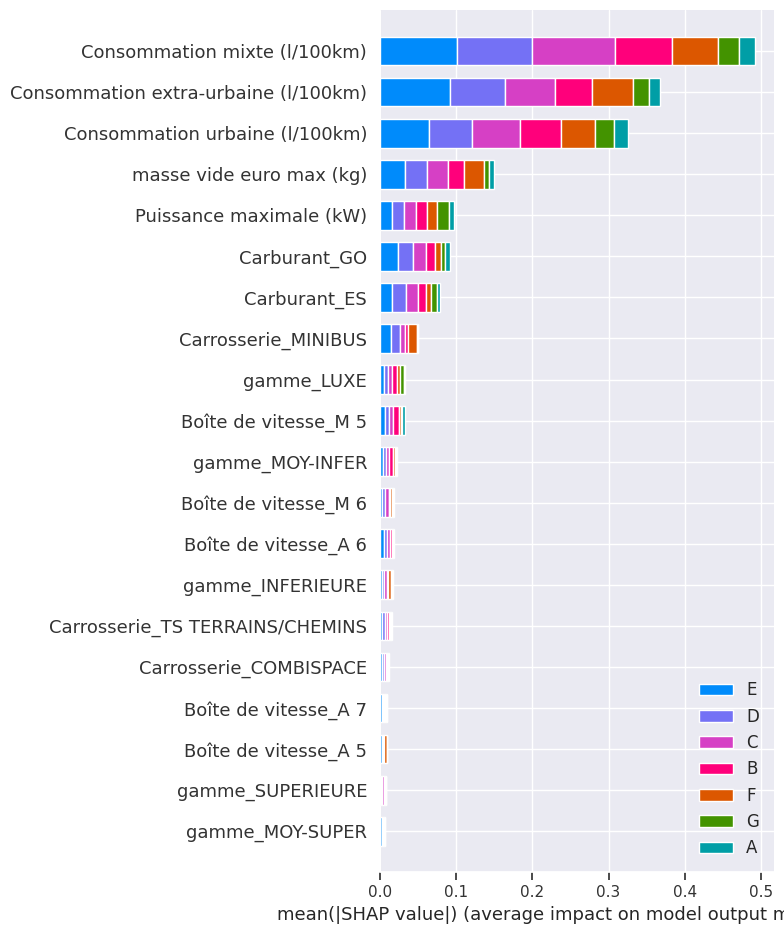

In [ ]:
# pour l'ensemble d'entrainement
# Créez un objet SHAP en utilisant l’explicatif TreeExplainer
explainer = shap.TreeExplainer(rf)
# Appelez la méthode explain en lui passant les données d’entrée
shap_values_train = explainer.shap_values(X_train)
# Affichez un graphique résumé de l’importance relative de chaque caractéristique
shap.summary_plot(shap_values_train,column_names, class_names={0:'A', 1:'B', 2:'C', 3:'D', 4:'E', 5:'F', 6:'G'} ,plot_type="bar")


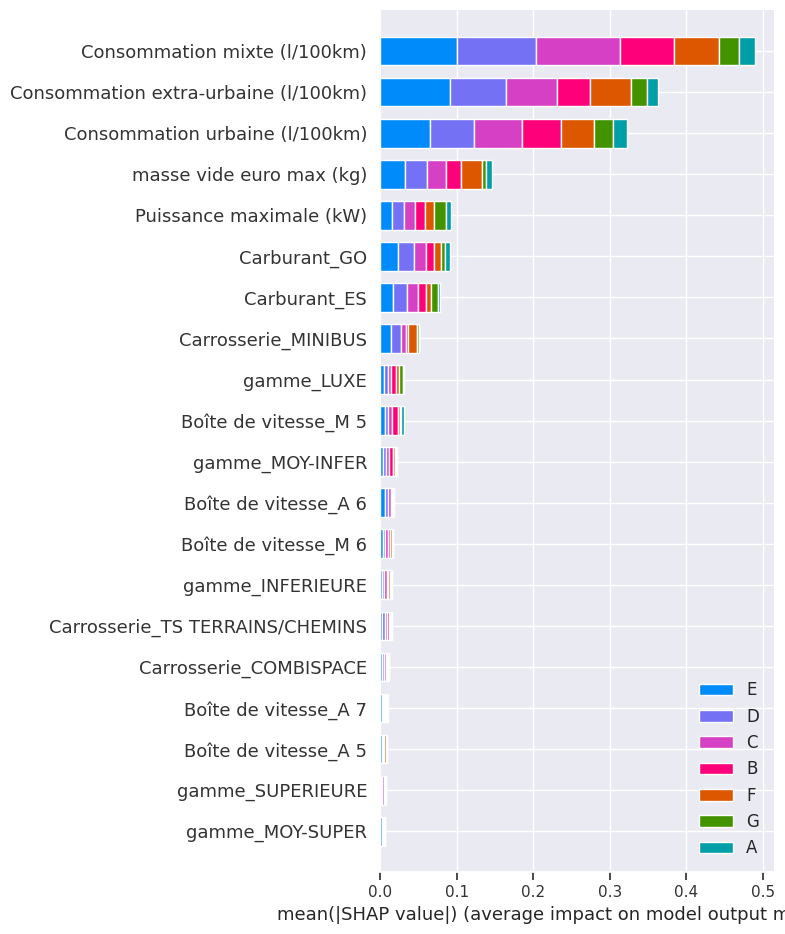

In [ ]:
# pour l'ensemble de test
explainer = shap.TreeExplainer(rf)
shap_values_test = explainer.shap_values(X_test)
shap.summary_plot(shap_values_test,column_names, class_names={0:'A', 1:'B', 2:'C', 3:'D', 4:'E', 5:'F', 6:'G'} ,plot_type="bar")



In [ ]:
# pour pouvoir utiliser les indexation avec Pandas
shap_values_train_ = [pd.DataFrame(shap_values_train[i]) for i in [0,1,2,3,4,5,6]]
shap_values_test_ = [pd.DataFrame(shap_values_test[i]) for i in [0,1,2,3,4,5,6]]



Pour UNE donnée : On peut voir les influences de chaque variable sur la prédiction


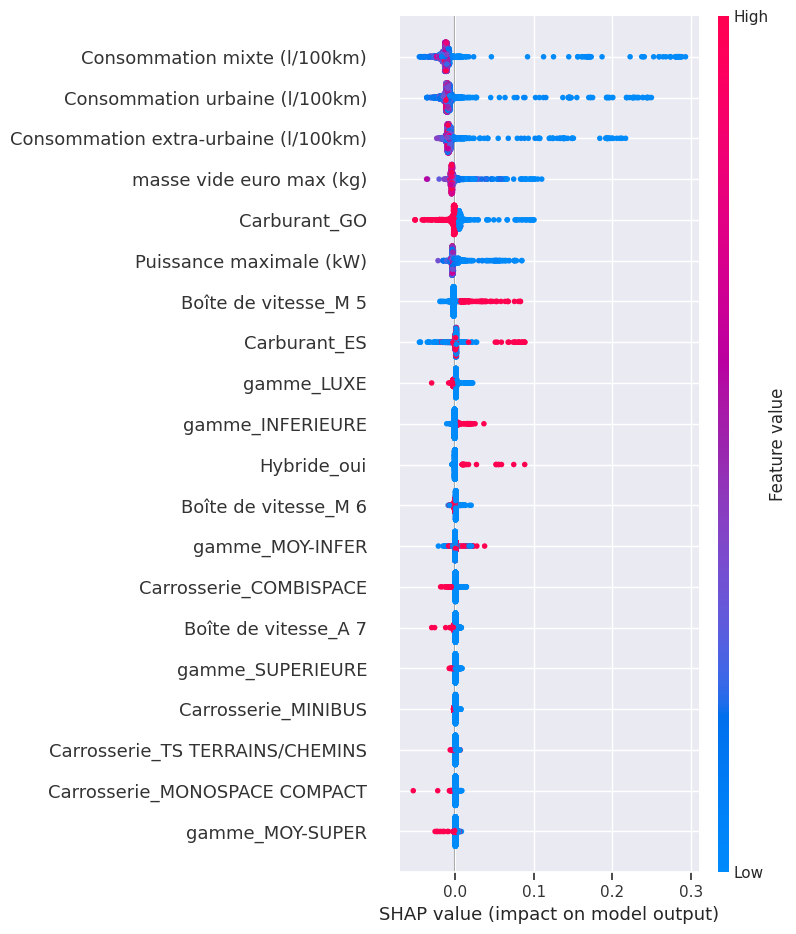

In [ ]:
#pour la class A
shap.summary_plot(shap_values_test[0] , X_test , feature_names = column_names)

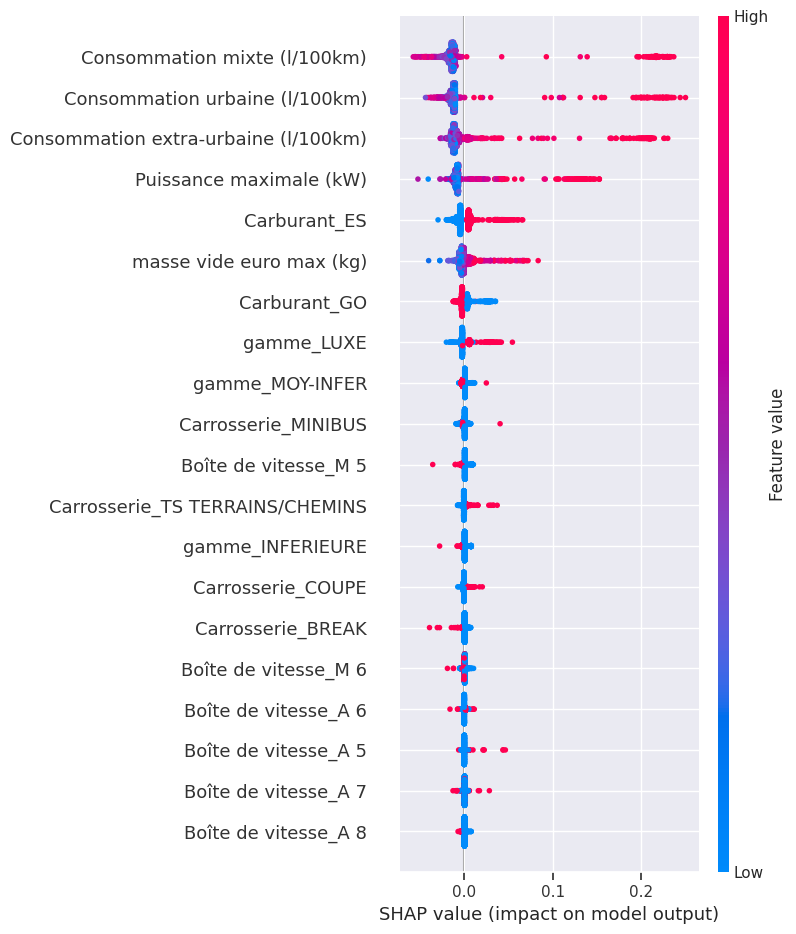

In [ ]:
shap.summary_plot(shap_values_test[6] , X_test , feature_names = column_names)
#Ces graphiques peuvent être dessinés pour chaque classe, par exemple pour la classe 6 la classe G
#  on obtient un graphique presque inverse :

#  Classification : SVM vs RandomForest

In [ ]:
  data_final=data.copy()
  data_final['labellisation'] =pd.cut(data_final['CO2 (g/km)'], bins=[0.0,100.0, 120.0 ,140.0, 160.0, 200.0,250.0,df['CO2 (g/km)'].max()],labels=['A','B','C','D','E','F','G'],right=True)
  data_final=data_final.drop(['Marque','Modèle dossier','Modèle UTAC','Désignation commerciale','CNIT', 'Type Variante Version (TVV)','Puissance administrative','masse vide euro min (kg)', 'Champ V9','Date de mise à jour','CO type I (g/km)', 'NOX (g/km)','CO2 (g/km)'], axis=1)


In [ ]:
# On sépare en jeu d'entrainement/test

start_time = time.time()
X_train = data_final.drop('labellisation', axis=1)
y_train = data_final['labellisation']
X_test  = test_data.copy()
elapsed_time = time.time() - start_time
print(f"Temps de calcul: {elapsed_time:.3f} seconds")

Temps de calcul: 0.021 seconds


In [ ]:
#Classification par RanfomForest

start_time = time.time()

numeric_features = [2,4,5,6,7]#
numeric_transformer = StandardScaler()

categorical_features = [0,1,3,8,9]
categorical_transformer = OneHotEncoder()


preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numeric_transformer, numeric_features)
        ]
    )


#Pipeline final de regroupement
clf = Pipeline(
    steps=[("preprocessor", preprocessor),
           ("classifier", RandomForestClassifier())]
)

clf.fit(X_train, y_train)
y_test = clf.predict(X_test)
print("model score: %.3f" % clf.score(X_test, y_test))
elapsed_time = time.time() - start_time
print(f"Temps de calcul: {elapsed_time:.3f} seconds")

model score: 1.000
Temps de calcul: 3.794 seconds


In [ ]:
# on isole les prediction du rf_clf  dans un dataframe
predictions_rf = pd.DataFrame({
        "cnit": test_data["cnit"],
        "rf_clf_predict": clf.predict(X_test)
    })
# on les merge avec les valeurs réelles
result = pd.merge(predictions_rf, result, on="cnit")

In [ ]:
#Classification par SVM


start_time = time.time()

numeric_features = [2,4,5,6,7]#
numeric_transformer = StandardScaler()

categorical_features = [0,1,3,8,9]
categorical_transformer = OneHotEncoder()


preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numeric_transformer, numeric_features)
        ]
    )


#Pipeline final de regroupement
clf = Pipeline(
    steps=[("preprocessor", preprocessor),
           ("classifier", svm.SVC(C = 10000,gamma = 0.002 ,kernel='rbf'))]
)

clf.fit(X_train, y_train)
y_test = clf.predict(X_test)
print("model score: %.3f" % clf.score(X_test, y_test))
elapsed_time = time.time() - start_time
print(f"Temps de calcul: {elapsed_time:.3f} seconds")

model score: 1.000
Temps de calcul: 5.376 seconds


In [ ]:
# on isole les prediction du rf_svm  dans un dataframe
predictions_svm = pd.DataFrame({
        "cnit": test_data["cnit"],
        "svm_predict": clf.predict(X_test)
    })
# on les merge également avec les vraies valeurs
result = pd.merge(predictions_svm, result, on="cnit")

In [ ]:
# matrices de classification
display("tableau de classification svm")
start_time = time.time()
display(pd.crosstab(result.labellisation,result.svm_predict, rownames=['Realité'], colnames=['Prédiction']))
elapsed_time = time.time() - start_time
print(f"Temps de calcul: {elapsed_time:.3f} seconds")
display("tableau de classification du RandomForest")
start_time = time.time()
display(pd.crosstab(result.labellisation,result.rf_clf_predict, rownames=['Realité'], colnames=['Prédiction']))
elapsed_time = time.time() - start_time
print(f"Temps de calcul: {elapsed_time:.3f} seconds")

'tableau de classification svm'

Prédiction,A,B,C,D,E,F,G
Realité,,,,,,,
A,270,9,0,0,0,0,0
B,0,1259,15,0,0,0,0
C,0,32,2145,39,2,0,0
D,0,0,3,1452,9,0,0
E,0,0,2,11,15666,371,0
F,0,0,0,0,7,29772,1
G,0,0,0,0,0,13,1942


Temps de calcul: 0.032 seconds


'tableau de classification du RandomForest'

Prédiction,A,B,C,D,E,F,G
Realité,,,,,,,
A,262,17,0,0,0,0,0
B,0,1220,54,0,0,0,0
C,0,69,2112,35,2,0,0
D,0,0,0,1462,2,0,0
E,0,0,0,11,16037,2,0
F,0,0,0,0,0,29780,0
G,0,0,0,0,0,14,1941


Temps de calcul: 0.024 seconds


In [ ]:
# Rapports de classification
start_time = time.time()
print("Rapport de classification Sector Vector Machine")
print(classification_report(result.labellisation,result.svm_predict))
elapsed_time = time.time() - start_time
print(f"Temps de calcul: {elapsed_time:.3f} seconds")
start_time = time.time()
print("Rapport de classification RandomForest ")
print(classification_report(result.labellisation,result.rf_clf_predict))
elapsed_time = time.time() - start_time
print(f"Temps de calcul: {elapsed_time:.3f} seconds")

Rapport de classification Sector Vector Machine
              precision    recall  f1-score   support

           A       1.00      0.97      0.98       279
           B       0.97      0.99      0.98      1274
           C       0.99      0.97      0.98      2218
           D       0.97      0.99      0.98      1464
           E       1.00      0.98      0.99     16050
           F       0.99      1.00      0.99     29780
           G       1.00      0.99      1.00      1955

    accuracy                           0.99     53020
   macro avg       0.99      0.98      0.99     53020
weighted avg       0.99      0.99      0.99     53020

Temps de calcul: 1.573 seconds
Rapport de classification RandomForest 
              precision    recall  f1-score   support

           A       1.00      0.94      0.97       279
           B       0.93      0.96      0.95      1274
           C       0.98      0.95      0.96      2218
           D       0.97      1.00      0.98      1464
           E 